In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
sample = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [5]:
y = train['count']
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [6]:
train['datetime'] = train['datetime'].astype('datetime64')
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
test['datetime'] = test['datetime'].astype('datetime64')

In [8]:
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

In [9]:
train['year'] = train['datetime'].dt.year
test['year'] = test['datetime'].dt.year

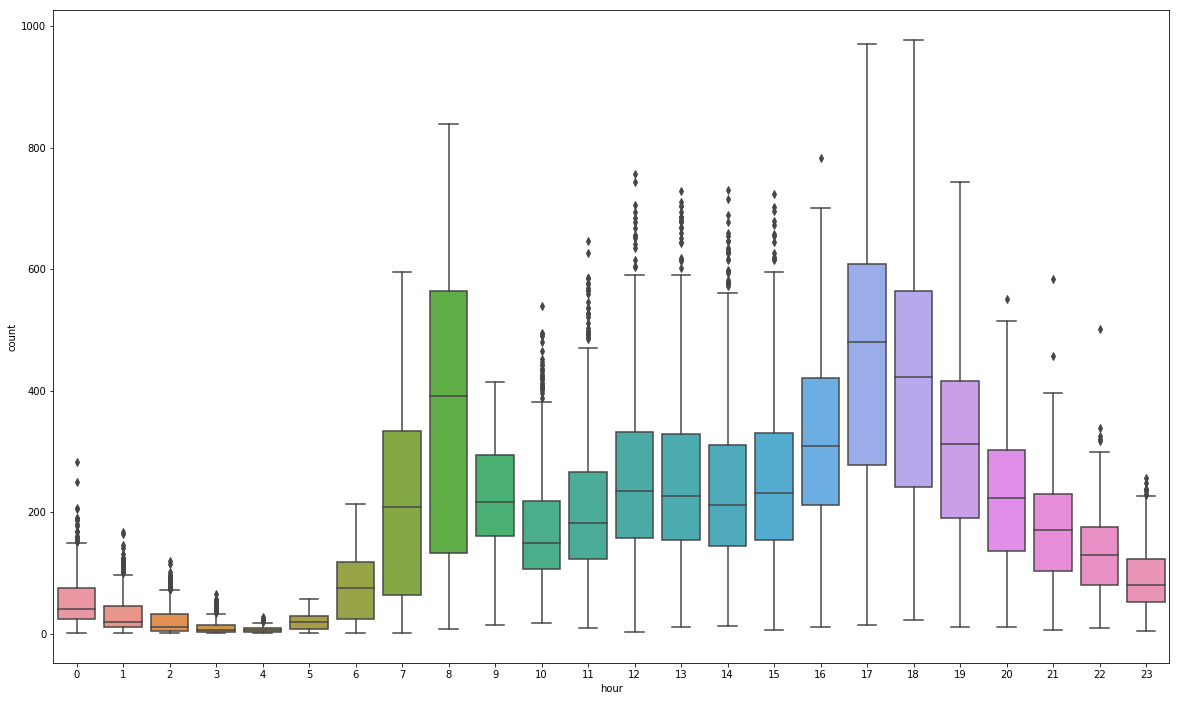

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
a,b = plt.subplots(1,1, figsize = (20,12) )
sns.boxplot(train['hour'], train['count'])

In [11]:
weekday_df = train[train['workingday'] == 1] 
weekday_df.shape

(7412, 14)

In [12]:
weekend_df = train[train['workingday'] == 0]

In [13]:
#a,b = plt.subplots(1,1, figsize = (20,12) )
#sns.boxplot(weekday_df['hour'], weekday_df['count'])

In [14]:
#a,b = plt.subplots(1,1, figsize = (20,12) )
#sns.boxplot(weekend_df['hour'], weekend_df['count'])

In [15]:
#a,b = plt.subplots(1,1, figsize = (20,12) )
#sns.stripplot(weekend_df['hour'], weekend_df['count'])

In [16]:
#a,b = plt.subplots(1,1, figsize = (20,12) )
#sns.swarmplot(weekend_df['hour'], weekend_df['count'])

In [17]:
#a,b = plt.subplots(1,1, figsize = (30,12) )
#sns.distplot(train['count'])

In [18]:
train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

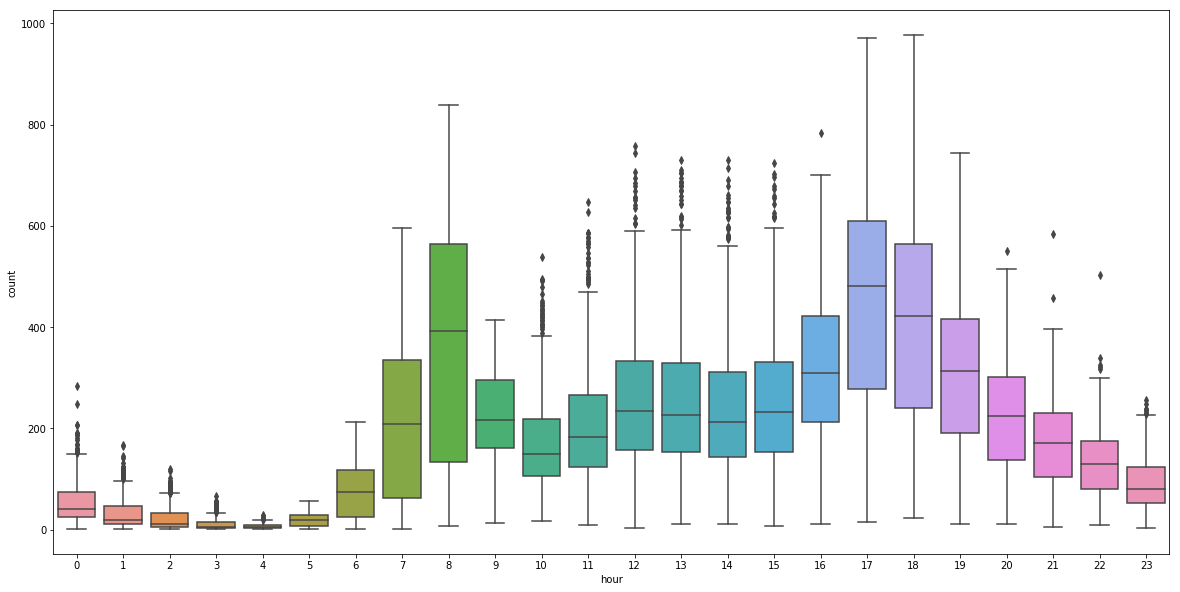

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot( x= 'hour', y = 'count', data =train)
plt.show()

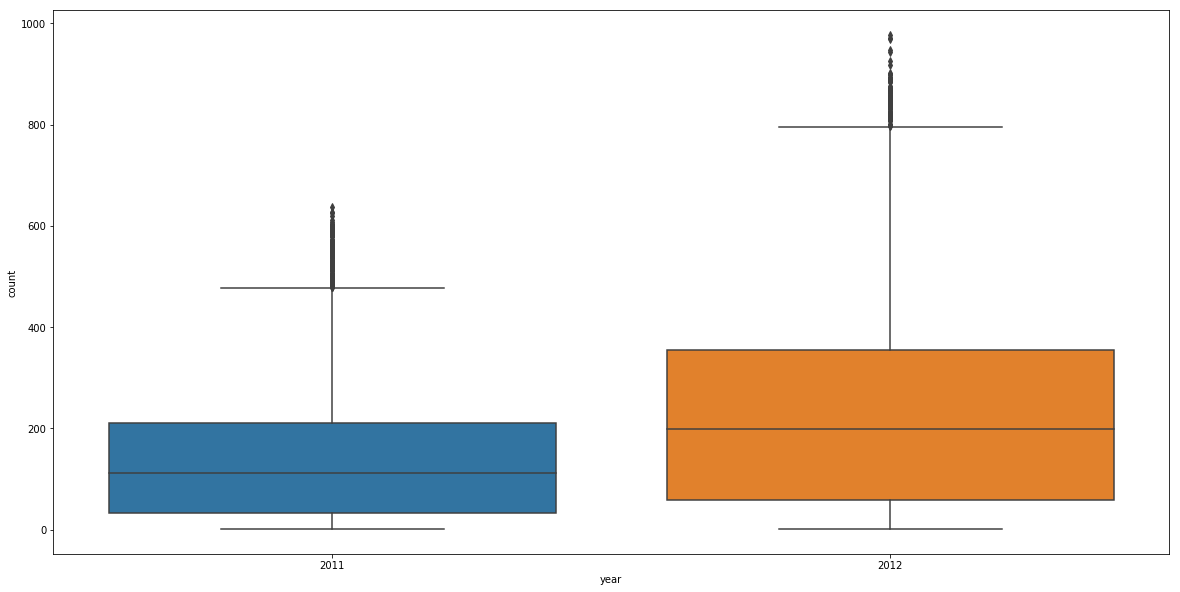

In [21]:
plt.figure(figsize = (20,10))
sns.boxplot( x= 'year', y = 'count', data =train)
plt.show()

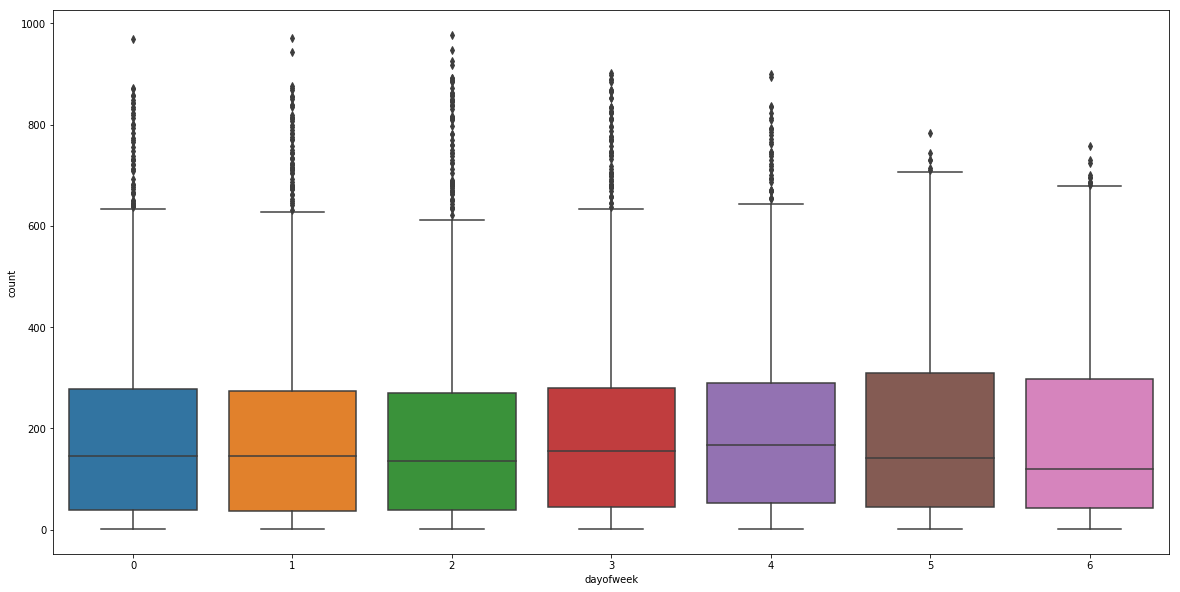

In [22]:
plt.figure(figsize = (20,10))
sns.boxplot( x= 'dayofweek', y = 'count', data =train)
plt.show()

In [23]:
x_train = train.drop(['casual','registered','count','datetime'],1)
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,0,2011,5
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0,2,2011,5
3,1,0,0,1,9.84,14.395,75,0.0,3,2011,5
4,1,0,0,1,9.84,14.395,75,0.0,4,2011,5


In [24]:
x_train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int64
year            int64
dayofweek       int64
dtype: object

In [25]:
x_test =  test.drop('datetime',1)
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor(nthread=4, max_depth = 7)
xgb.fit(x_train,np.log(y))
result = np.exp(xgb.predict(x_test))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:59:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 7)

In [29]:
#rf.fit(x_train,np.log(y))

In [1]:
# result = np.exp(rf.predict(x_test))
# result

In [31]:
sample['count'] = result
sample.head()

,datetime,count
0,2011-01-20 00:00:00,14.374384
1,2011-01-20 01:00:00,4.864264
2,2011-01-20 02:00:00,3.677506
3,2011-01-20 03:00:00,2.299641
4,2011-01-20 04:00:00,1.980157


In [32]:
sample.to_csv('submission.csv',index = False)